In [46]:
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)

In [3]:
df = pd.read_csv('real_estate_dataset_mk_missing.csv')


In [4]:
df.head()

,city,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,NaN,80.0,4.0,5.0,2009.0,3.55,150804.0
1,Skopje,92.1,5.0,3.0,2008.0,3.54,178480.0
2,Skopje,97.4,5.0,0.0,2002.0,2.41,168418.0
3,Skopje,49.5,3.0,5.0,2024.0,3.97,90170.0
4,Skopje,NaN,3.0,2.0,NaN,3.75,77454.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     1115 non-null   object 
 1   area_sq_meters           1108 non-null   float64
 2   num_rooms                1114 non-null   float64
 3   floor                    1090 non-null   float64
 4   year_built               1102 non-null   float64
 5   distance_from_center_km  1128 non-null   float64
 6   price                    1105 non-null   float64
dtypes: float64(6), object(1)
memory usage: 65.8+ KB


In [6]:
df.isnull().sum()

city                        85
area_sq_meters              92
num_rooms                   86
floor                      110
year_built                  98
distance_from_center_km     72
price                       95
dtype: int64

In [7]:
df["city"].value_counts()

city
Skopje    495
Bitola    201
Ohrid     171
Tetovo    144
Prilep    104
Name: count, dtype: int64

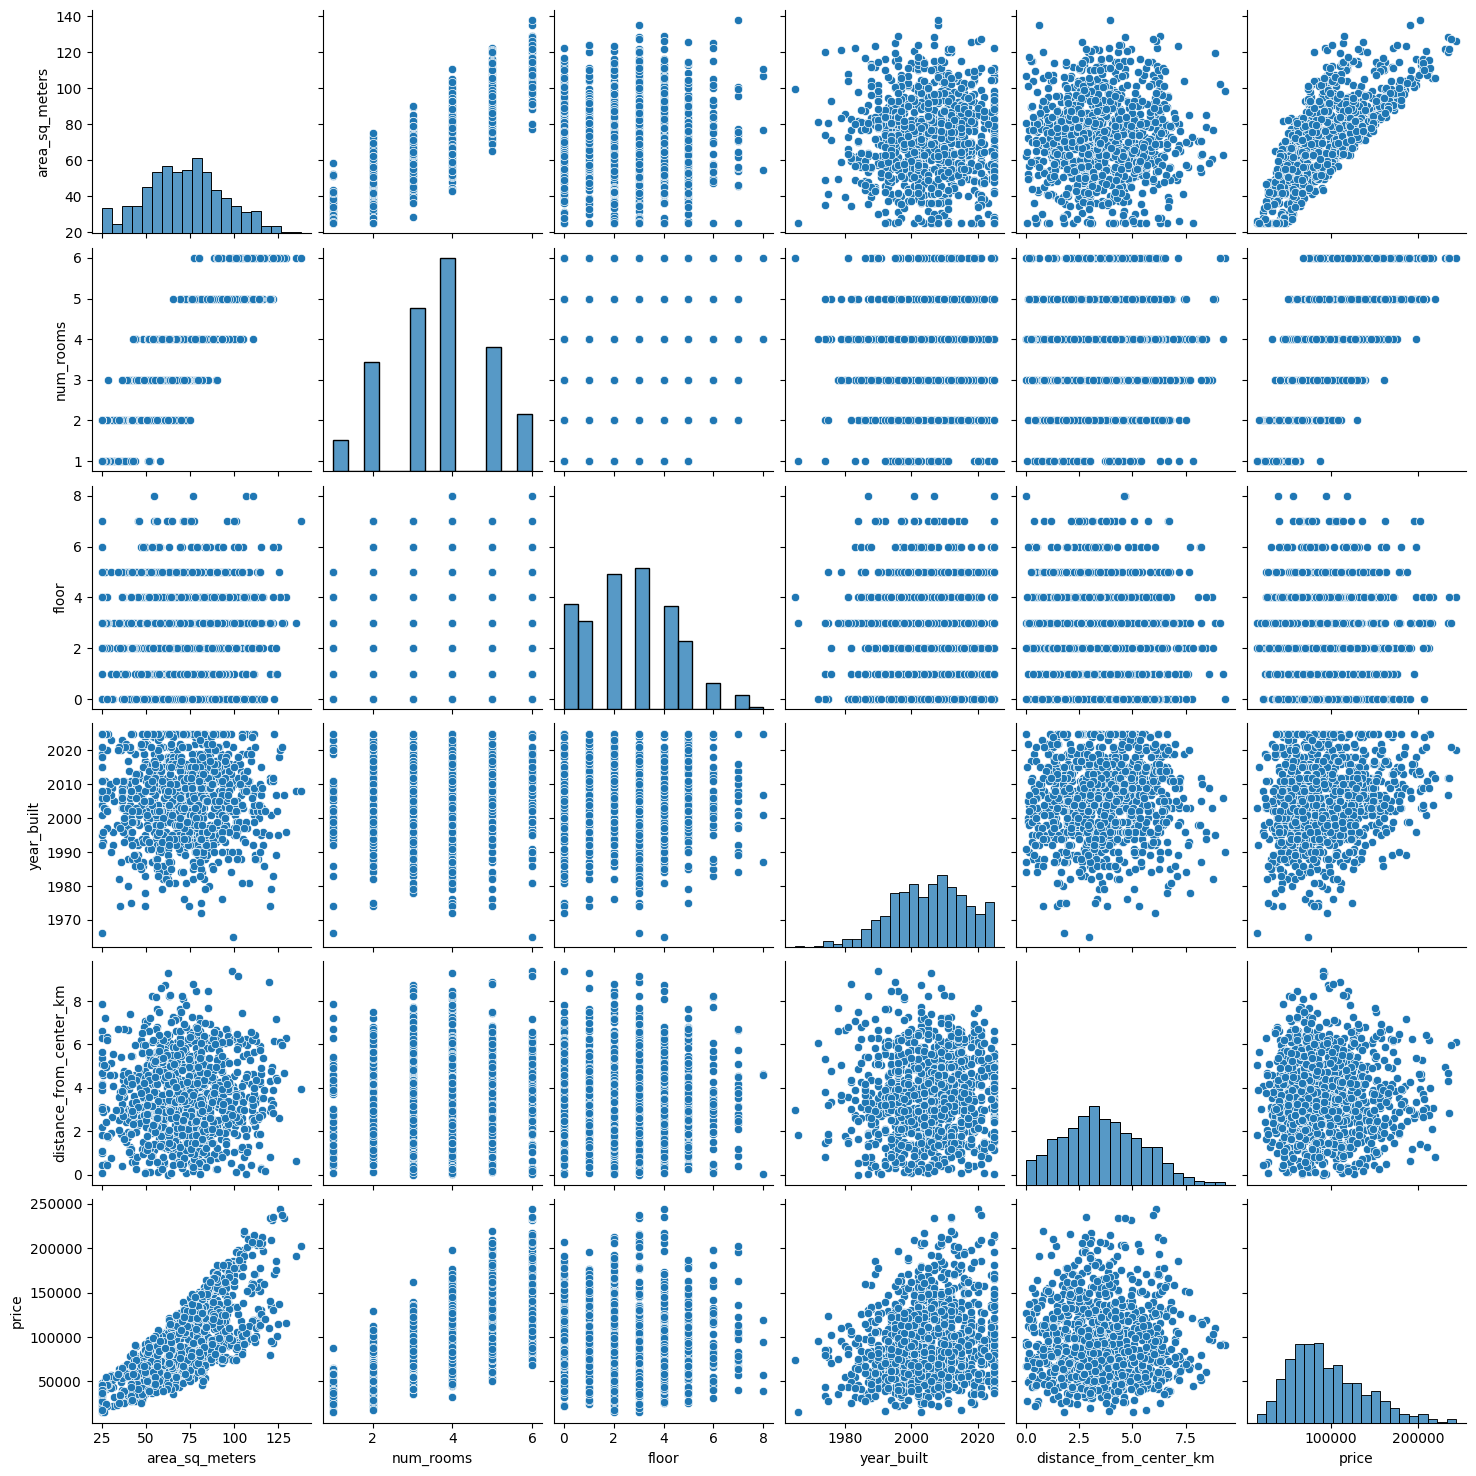

In [8]:
sns.pairplot(df)

<Axes: >

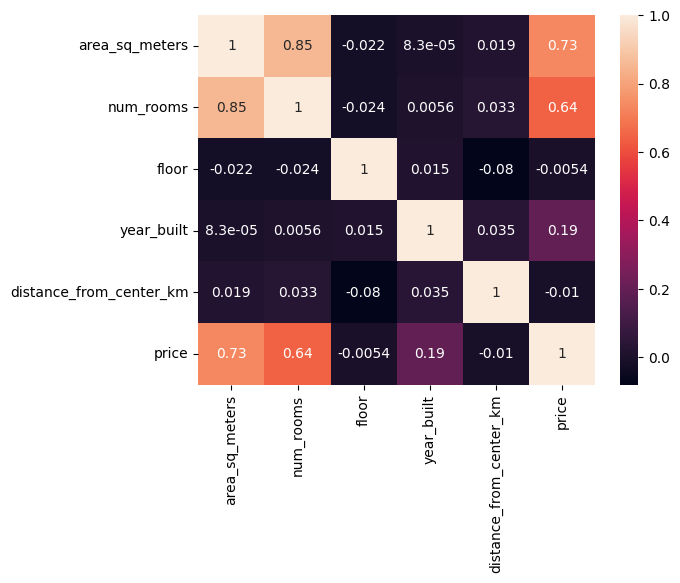

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [11]:
df.isnull().sum()

city                        85
area_sq_meters              92
num_rooms                   86
floor                      110
year_built                  98
distance_from_center_km     72
price                       95
dtype: int64

In [13]:
df.drop(columns=["num_rooms"], inplace=True)

In [14]:
df = pd.concat([df, pd.get_dummies(df["city"])],axis=1)
df.drop(columns=["city"], inplace=True)

In [15]:
df.head()

,area_sq_meters,floor,year_built,distance_from_center_km,price,Bitola,Ohrid,Prilep,Skopje,Tetovo
0,80.0,5.0,2009.0,3.55,150804.0,False,False,False,False,False
1,92.1,3.0,2008.0,3.54,178480.0,False,False,False,True,False
2,97.4,0.0,2002.0,2.41,168418.0,False,False,False,True,False
3,49.5,5.0,2024.0,3.97,90170.0,False,False,False,True,False
4,NaN,2.0,NaN,3.75,77454.0,False,False,False,True,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_sq_meters           1108 non-null   float64
 1   floor                    1090 non-null   float64
 2   year_built               1102 non-null   float64
 3   distance_from_center_km  1128 non-null   float64
 4   price                    1105 non-null   float64
 5   Bitola                   1200 non-null   bool   
 6   Ohrid                    1200 non-null   bool   
 7   Prilep                   1200 non-null   bool   
 8   Skopje                   1200 non-null   bool   
 9   Tetovo                   1200 non-null   bool   
dtypes: bool(5), float64(5)
memory usage: 52.9 KB


In [17]:
df.isnull().sum()

area_sq_meters              92
floor                      110
year_built                  98
distance_from_center_km     72
price                       95
Bitola                       0
Ohrid                        0
Prilep                       0
Skopje                       0
Tetovo                       0
dtype: int64

<Axes: >

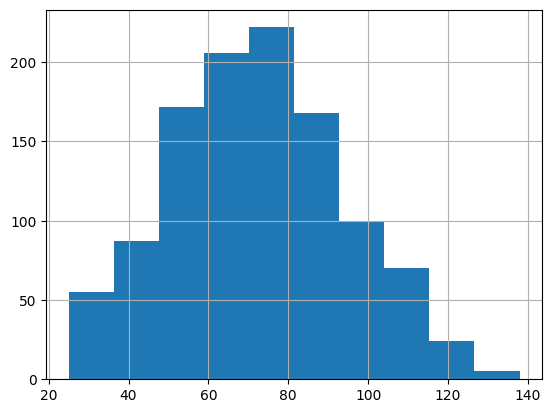

In [18]:
df["area_sq_meters"].hist()

In [21]:
imputer = SimpleImputer(strategy="median")
df["area_sq_meters"] = imputer.fit_transform(df[["area_sq_meters"]])

In [22]:
df.isnull().sum()

area_sq_meters               0
floor                      110
year_built                  98
distance_from_center_km     72
price                       95
Bitola                       0
Ohrid                        0
Prilep                       0
Skopje                       0
Tetovo                       0
dtype: int64

<Axes: >

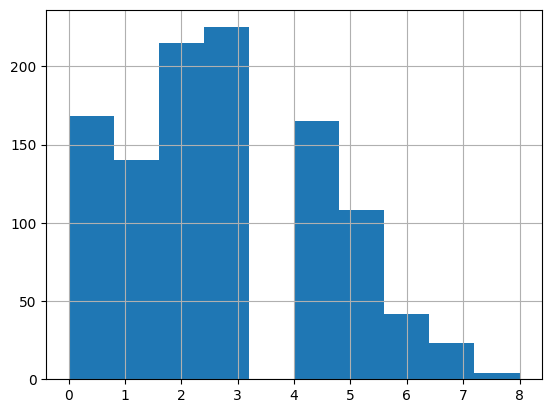

In [23]:
df["floor"].hist()

In [25]:
imputerknn = KNNImputer(n_neighbors=11)

In [26]:
df["floor"] = imputerknn.fit_transform(df[["floor"]])

In [30]:
df.isnull().sum()

area_sq_meters              0
floor                       0
year_built                  0
distance_from_center_km    72
price                      95
Bitola                      0
Ohrid                       0
Prilep                      0
Skopje                      0
Tetovo                      0
dtype: int64

<Axes: >

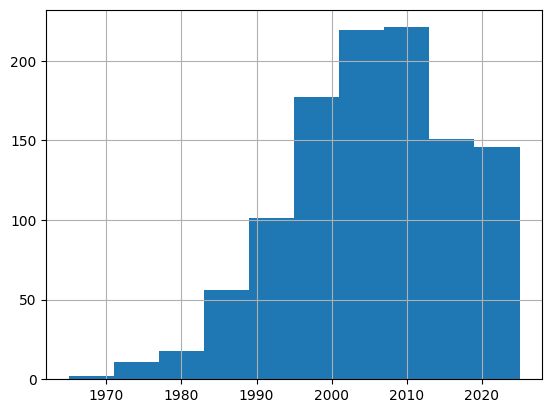

In [28]:
df["year_built"].hist()

In [29]:
imputer = SimpleImputer(strategy="median")
df["year_built"] = imputer.fit_transform(df[["year_built"]])

<Axes: >

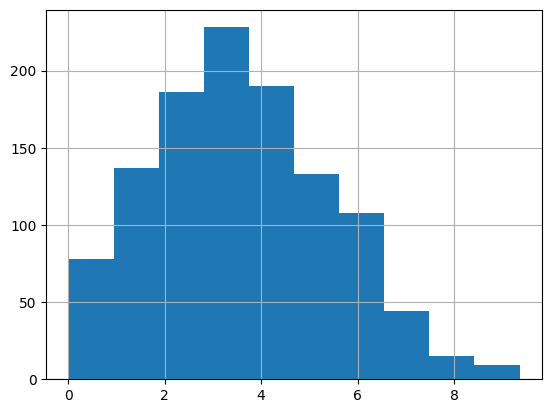

In [31]:
df["distance_from_center_km"].hist()

In [32]:
imputer = SimpleImputer(strategy="median")
df["distance_from_center_km"] = imputer.fit_transform(df[["distance_from_center_km"]])

In [33]:
df.isnull().sum()

area_sq_meters              0
floor                       0
year_built                  0
distance_from_center_km     0
price                      95
Bitola                      0
Ohrid                       0
Prilep                      0
Skopje                      0
Tetovo                      0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_sq_meters           1200 non-null   float64
 1   floor                    1200 non-null   float64
 2   year_built               1200 non-null   float64
 3   distance_from_center_km  1200 non-null   float64
 4   price                    1105 non-null   float64
 5   Bitola                   1200 non-null   bool   
 6   Ohrid                    1200 non-null   bool   
 7   Prilep                   1200 non-null   bool   
 8   Skopje                   1200 non-null   bool   
 9   Tetovo                   1200 non-null   bool   
dtypes: bool(5), float64(5)
memory usage: 52.9 KB


In [35]:
df = df.dropna(subset=["price"], axis=0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1105 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_sq_meters           1105 non-null   float64
 1   floor                    1105 non-null   float64
 2   year_built               1105 non-null   float64
 3   distance_from_center_km  1105 non-null   float64
 4   price                    1105 non-null   float64
 5   Bitola                   1105 non-null   bool   
 6   Ohrid                    1105 non-null   bool   
 7   Prilep                   1105 non-null   bool   
 8   Skopje                   1105 non-null   bool   
 9   Tetovo                   1105 non-null   bool   
dtypes: bool(5), float64(5)
memory usage: 57.2 KB


In [40]:
X, y = df.drop(columns=["price"]), df["price"]

In [41]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
regressor = LinearRegression()

In [43]:
regressor.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
pred_y = regressor.predict(test_X)


In [47]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 11409.245090658194
MAPE: 0.14404258095532255
MSE: 257148765.7020626
RMSE: 16035.858745388805
R2 Score: 0.8676235416932923


In [48]:
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
)


In [49]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")


In [50]:
print("Cross-validation R² scores:", cv_scores)
print("Mean R²:", cv_scores.mean())
print("Std of R²:", cv_scores.std())

Cross-validation R² scores: [0.77973679 0.87279722 0.87443305 0.85313835 0.8816491 ]
Mean R²: 0.8523509009660257
Std of R²: 0.03751662664002203
